In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
#  Load Fashion MNIST Dataset
fashion_mnist = fetch_openml('Fashion-MNIST')

X, y = fashion_mnist.data, fashion_mnist.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
# Convert target to numeric
y = y.astype(int)

In [17]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 3: Perform PCA for Dimensionality Reduction
pca = PCA(n_components=50)  # Reduce to 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:


# train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


In [20]:

# Train Models Without PCA
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

dt_acc_no_pca = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
rf_acc_no_pca = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
svm_acc_no_pca = evaluate_model(svm_model, X_train, X_test, y_train, y_test)


In [21]:
#Train Models With PCA

dt_model_pca = DecisionTreeClassifier(random_state=42)
rf_model_pca = RandomForestClassifier(random_state=42)
svm_model_pca = SVC()

dt_acc_pca = evaluate_model(dt_model_pca, X_train_pca, X_test_pca, y_train, y_test)
rf_acc_pca = evaluate_model(rf_model_pca, X_train_pca, X_test_pca, y_train, y_test)
svm_acc_pca = evaluate_model(svm_model_pca, X_train_pca, X_test_pca, y_train, y_test)


In [22]:
# Compare the Results
print("Decision Tree Accuracy without PCA:", dt_acc_no_pca)
print("Decision Tree Accuracy with PCA:", dt_acc_pca)

print("Random Forest Accuracy without PCA:", rf_acc_no_pca)
print("Random Forest Accuracy with PCA:", rf_acc_pca)

print("SVM Accuracy without PCA:", svm_acc_no_pca)
print("SVM Accuracy with PCA:", svm_acc_pca)

Decision Tree Accuracy without PCA: 0.7941428571428572
Decision Tree Accuracy with PCA: 0.7724285714285715
Random Forest Accuracy without PCA: 0.8824285714285715
Random Forest Accuracy with PCA: 0.8665714285714285
SVM Accuracy without PCA: 0.8887857142857143
SVM Accuracy with PCA: 0.8813571428571428


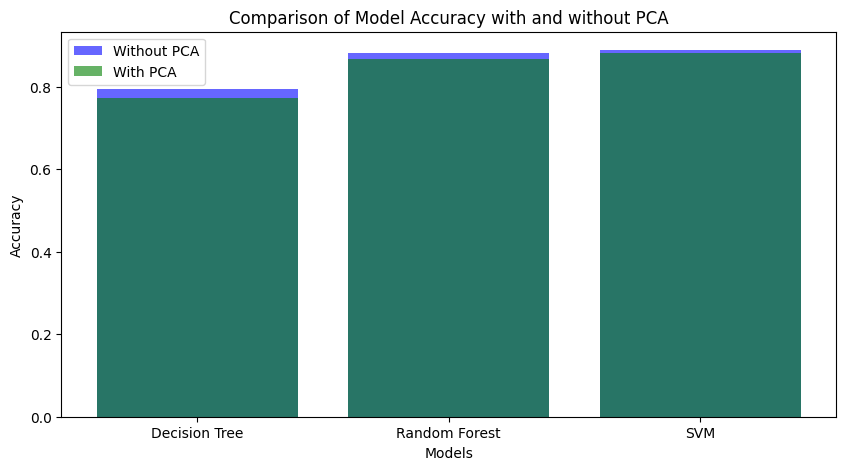

In [23]:
# Plotting the comparison
models = ['Decision Tree', 'Random Forest', 'SVM']
accuracy_no_pca = [dt_acc_no_pca, rf_acc_no_pca, svm_acc_no_pca]
accuracy_pca = [dt_acc_pca, rf_acc_pca, svm_acc_pca]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_no_pca, color='blue', alpha=0.6, label='Without PCA')
plt.bar(models, accuracy_pca, color='green', alpha=0.6, label='With PCA')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy with and without PCA')
plt.legend()
plt.show()